Accuracy: 0.9074
Precision: 0.9444
Recall: 0.8095
F1 Score: 0.8718
ROC AUC: 0.9221
Confusion Matrix:
[[32  1]
 [ 4 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



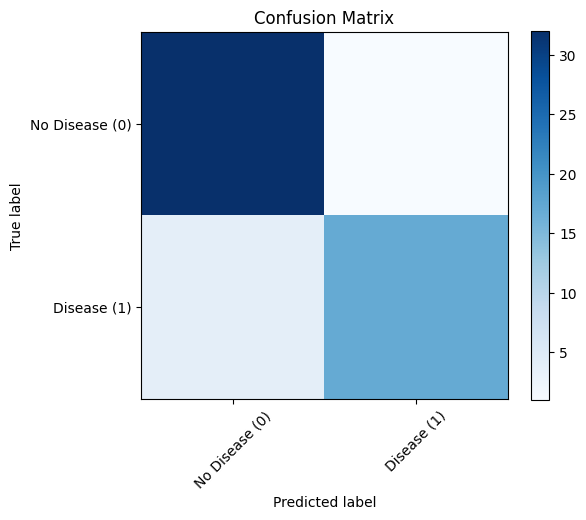

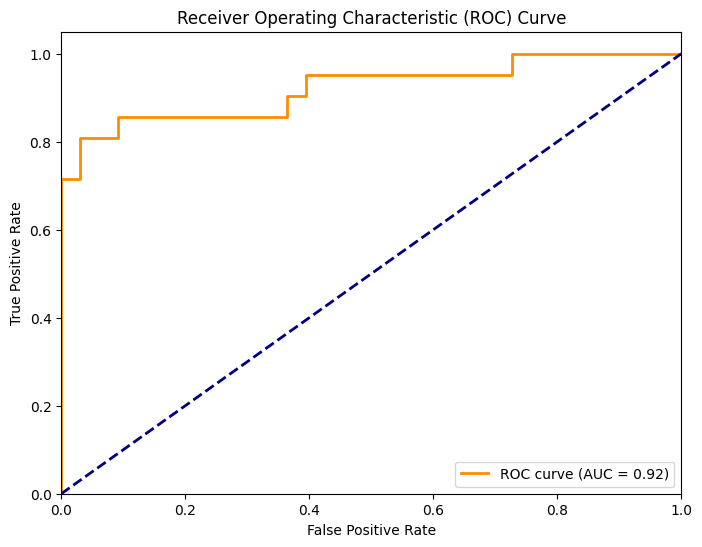


Baseline Model Performance (Dummy Classifier):
Accuracy: 0.6111
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.5000

--- Model Performance Analysis ---
The model's accuracy of 0.9074 is better than the baseline accuracy of 0.6111.


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


['scaler.joblib']

In [3]:
# Import necessary libraries
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split  # Add this line to import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
df = pd.read_csv('Heart_Disease_Prediction_Cleaned.csv')

# Split into features (X) and target (y)
X = df.drop(columns=['Heart Disease'])  # Features
y = df['Heart Disease']  # Target

# Split into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the saved model and scaler
best_model = joblib.load('svm_heart_disease_model.joblib')
scaler = joblib.load('scaler.joblib')

# Standardize the features (important for SVM)
X_test_scaled = scaler.transform(X_test)

# --- Make Predictions on the Testing Data ---
y_test_pred = best_model.predict(X_test_scaled)
y_test_prob = best_model.predict_proba(X_test_scaled)[:, 1]  # For ROC and AUC

# --- Model Evaluation ---
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

# --- Classification Report ---
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# --- Visualize Confusion Matrix ---
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['No Disease (0)', 'Disease (1)']
tick_marks = [0, 1]
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# --- Compare Against Baseline (Dummy Classifier) ---
dummy = DummyClassifier(strategy="most_frequent")  # Predicts the majority class
dummy.fit(X_train, y_train)
y_dummy_pred = dummy.predict(X_test)

dummy_accuracy = accuracy_score(y_test, y_dummy_pred)
dummy_precision = precision_score(y_test, y_dummy_pred)
dummy_recall = recall_score(y_test, y_dummy_pred)
dummy_f1 = f1_score(y_test, y_dummy_pred)
dummy_roc_auc = roc_auc_score(y_test, dummy.predict_proba(X_test)[:, 1])

print("\nBaseline Model Performance (Dummy Classifier):")
print(f"Accuracy: {dummy_accuracy:.4f}")
print(f"Precision: {dummy_precision:.4f}")
print(f"Recall: {dummy_recall:.4f}")
print(f"F1 Score: {dummy_f1:.4f}")
print(f"ROC AUC: {dummy_roc_auc:.4f}")

# --- Model Performance Analysis ---
# We can analyze how much better the trained model is compared to the baseline.
print("\n--- Model Performance Analysis ---")
if accuracy > dummy_accuracy:
    print(f"The model's accuracy of {accuracy:.4f} is better than the baseline accuracy of {dummy_accuracy:.4f}.")
else:
    print(f"The model's accuracy is lower than the baseline accuracy, indicating underperformance.")

# You can perform similar analysis for other metrics like Precision, Recall, and AUC

# Save the trained model and scaler
joblib.dump(best_model, 'svm_heart_disease_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
